# 3. Linear Regression – Applied

In [44]:
from pathlib import Path
import pandas as pd
import statsmodels.api  as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy import stats
plt.style.use('classic') # pretty matplotlib plots
sns.set_style(style='white')

warnings.filterwarnings('ignore')

### Q8. This question involves the use of simple linear regression on the Auto data set.

In [3]:
path = Path('Data/Auto.csv')

In [4]:
Auto = pd.read_csv(path)
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### **(a)** Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:

- i. Is there a relationship between the predictor and the response?
- ii. How strong is the relationship between the predictor and the response?
- iii. Is the relationship between the predictor and the response positive or negative?
- iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [6]:
data = Auto[['horsepower', 'mpg']].sort_values('horsepower')
X1 = data['horsepower']
Y = data['mpg']
X = sm.add_constant(X1)

(0.0, 250.0)

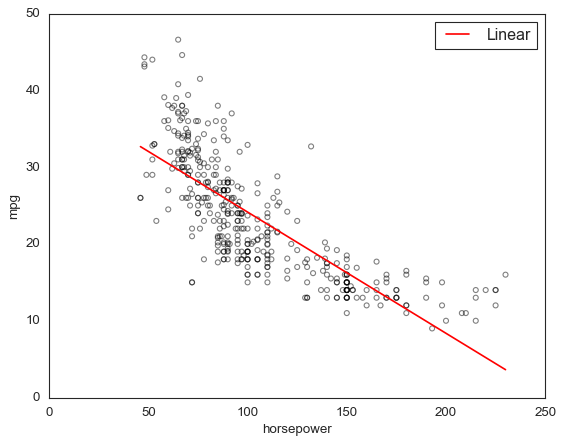

In [7]:
axes = sns.regplot(X1, Y, ci=None, label='Linear', scatter=False, color='red')
axes.scatter(X1, Y, facecolors='None', edgecolors='k', alpha=.5)
axes.legend()
axes.set_xlim([0, 250])

In [8]:
results = sm.OLS(Y,X).fit()

In [9]:
results.params

const         39.935861
horsepower    -0.157845
dtype: float64

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           7.03e-81
Time:                        08:32:40   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. Is there a relationship between the predictor and the response? 
> We can answer this question by testing the null hypothesis. 
The p-value corresponding to the F-statistic is very small, indicating a clear evidence of a relationship between `mpg` and ```horsepower```.

ii. How strong is the relationship between the predictor and the response?
> We can use the residual standard error and the R-squared value for answering this question.
The mean of mpg is 23.4459184. The RSE of the fit was 4.9057569 which indicates a percentage error of about 20.9%. 
We may also note that as the R$^2$ is equal to 0.6059483, almost 60.5948258% of the variability in `mpg` can be explained 
using `horsepower`.

>In Python statsmodel we can calculate residual standard error or the residual standard deviation by taking the square root of the scale attribute:
`print(np.sqrt(results.scale))`
Or we can calculate mannually: 
`print(np.sqrt(np.divide(results.ssr, np.subtract(len(Auto), 2))))`

iii. Is the relationship between the predictor and the response positive or negative?
>This is can be answered by looking at the plotted regression line or the regression coeficient. 
Since `horsepower` is negative the relationship is also negative, meaning that more horsepower results in less mpg.

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% conﬁdence and prediction intervals?

In [11]:
ex = [1, 98]
pred1 = results.get_prediction(ex).summary_frame(alpha=0.05)
print(f"The predicted mpg associated with {ex[1]} is {pred1['mean'][0]:.2f}.")

The predicted mpg associated with 98 is 24.47.


In [12]:
print(f"The associated confidence and prediction intervals are: [{pred1['mean_ci_lower'][0]:.2f}, {pred1['mean_ci_upper'][0]:.2f}] and [{pred1['obs_ci_lower'][0]:.2f}, {pred1['obs_ci_upper'][0]:.2f}]")

The associated confidence and prediction intervals are: [23.97, 24.96] and [14.81, 34.12]


#### **(b)** Plot the response and the predictor. Use the abline() function to display the least squares regression line.

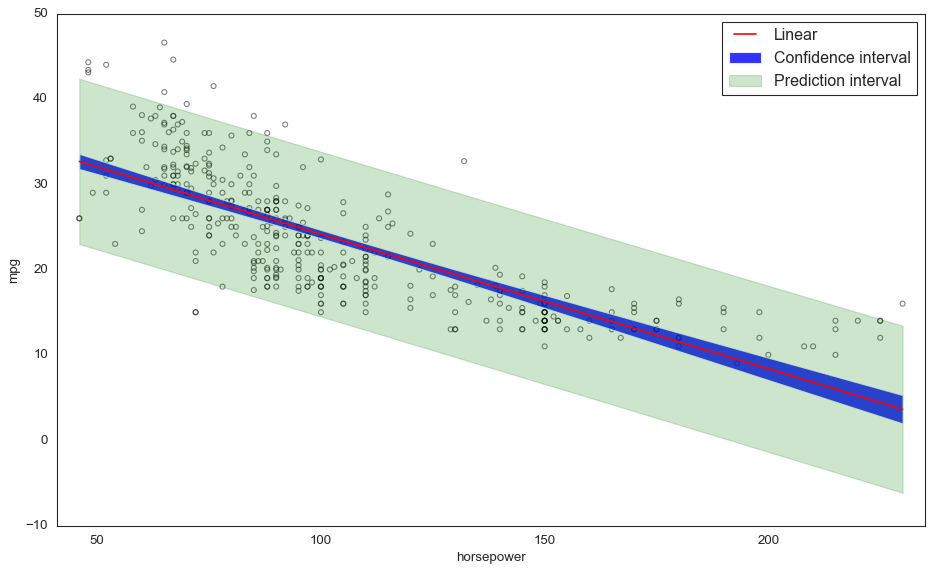

In [13]:
# Plotting the the linear regression with confidence and prediction intervals
pred2 = results.get_prediction(X).summary_frame(alpha=0.05)

fig = plt.figure(figsize=(14,8))
axes = sns.regplot(X1, Y, ci=None, label='Linear', scatter=False, color='red')

axes.scatter(X1, Y, facecolors='None', edgecolors='k', alpha=.5)
axes.fill_between(X1, pred2['mean_ci_lower'], pred2['mean_ci_upper'], alpha=.8, label='Confidence interval')
axes.fill_between(X1, pred2['obs_ci_lower'], pred2['obs_ci_upper'], alpha=.2, label='Prediction interval', color='green')


axes.set_xlim([X1.min()-5, X1.max()+5])
axes.legend()

#### **(c)** Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

**Regression assumptions**
Linear regression makes several assumptions about the data, such as :

* Linearity of the data. The relationship between the predictor (x) and the outcome (y) is assumed to be linear.
* Normality of residuals. The residual errors are assumed to be normally distributed.
* Homogeneity of residuals variance. The residuals are assumed to have a constant variance (homoscedasticity)
* Uncorrelated residuals.

In [14]:
fitted_values = results.fittedvalues
residuals = results.resid
studentized_residuals = results.get_influence().resid_studentized_external
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(studentized_residuals))
# leverage, from statsmodels internals
model_leverage = results.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = results.get_influence().cooks_distance[0]

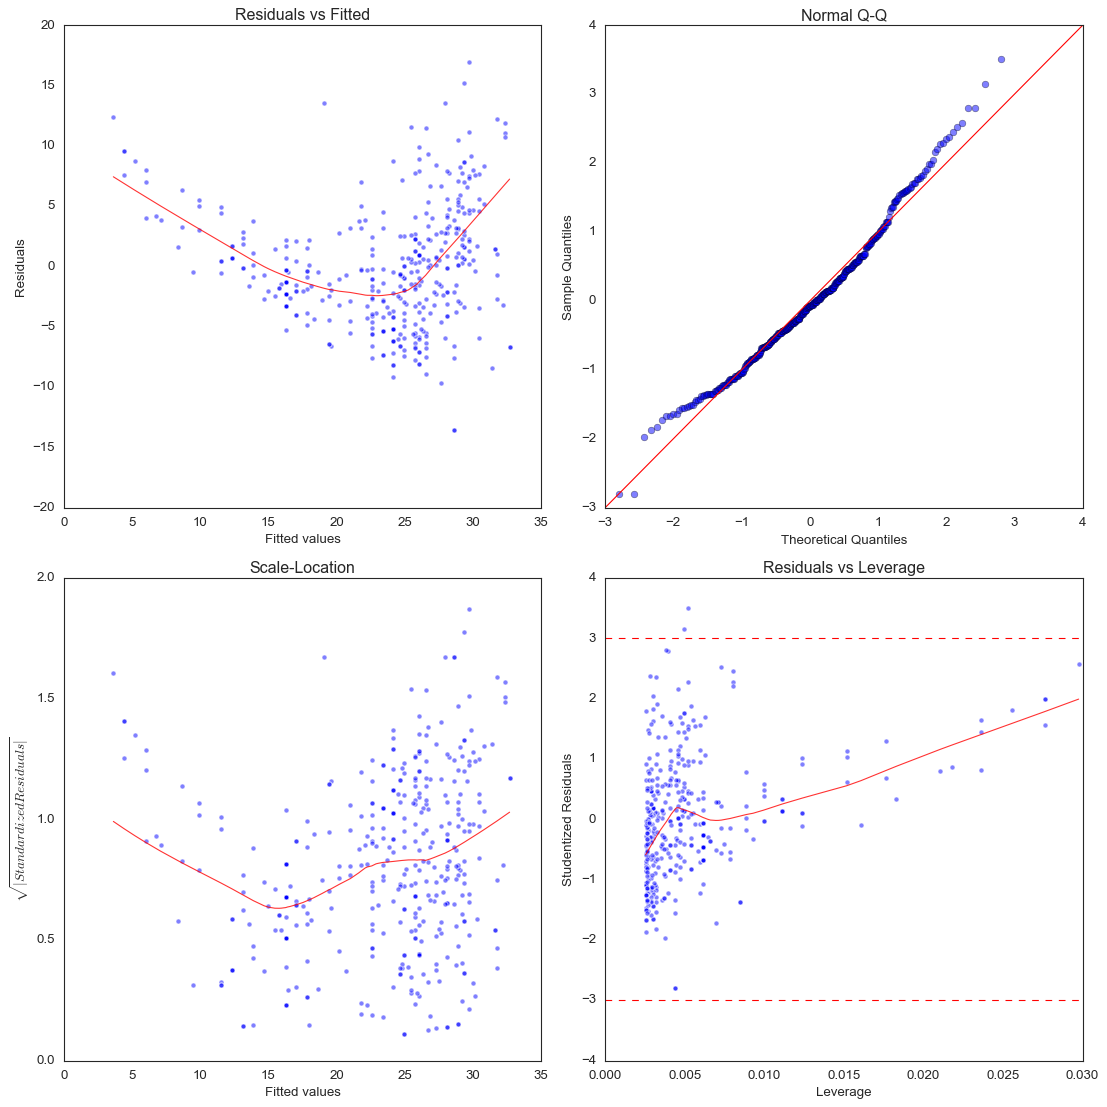

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(14, 14))

# Residual vs Fitted
sns.regplot(fitted_values, residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax1);

ax1.scatter(fitted_values, residuals, alpha=0.5);
ax1.set_title('Residuals vs Fitted')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals');

# Q-Q plot
QQ = ProbPlot(studentized_residuals)
QQ.qqplot(line='45', alpha=0.5, color='blue', lw=1, ax=ax2)
ax2.set_title('Normal Q-Q')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Sample Quantiles');

# Scale-location
sns.regplot(fitted_values, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax3);
ax3.scatter(fitted_values, model_norm_residuals_abs_sqrt, alpha=0.5);
ax3.set_title('Scale-Location')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('$\sqrt{|Standardized Residuals|}$');

# Residuals vs Leverage
sns.regplot(model_leverage, studentized_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax4);

ax4.scatter(model_leverage, studentized_residuals, alpha=0.5);
ax4.axhline(y=3, color='red', linestyle='--')
ax4.axhline(y=-3, color='red', linestyle='--')
ax4.set_title('Residuals vs Leverage')
ax4.set_xlabel('Leverage')
ax4.set_ylabel('Studentized Residuals');


fig.tight_layout()
plt.show()



The diagnostic plots show residuals in four different ways:

* **Residuals vs Fitted:** used to check the linear relationship assumptions. A horizontal line, without distinct patterns is an indication for a linear relationship, what is good. Also if a funnel shape can be identified in the distribution of the residuals, than heteroskedasticity (non-constant variance of residuals) may be present.

* **Normal Q-Q:** used to examine whether the residuals are normally distributed. It’s good if residuals points follow the straight dashed line.

* **Scale-Location (or Spread-Location):** used to check the homogeneity of variance of the residuals (homoscedasticity). Horizontal line with equally spread points is a good indication of homoscedasticity.

* **Residuals vs Leverage:** used to identify influential cases, that is extreme values that might influence the regression results when included or excluded from the analysis. This plot will be described further in the next sections.

**Interpretation:**

* The residual vs fitted plot clearly shows the violation of the linear assumption. The model unable to capture the non-linear behavior of the data. Also, a funnel shape is evident in the plot, which suggest non constant variance i.e. heteroskedasticity.
* Based on the Q-Q plot, which follows a roughly straight line, the normal distribution can be assumed.
* The heteroskedasticity can be identified with the scale-location plot too.
* Outliers and high leverage points can be identified using the residula vs leverage plot. Points with absolute studentized residual value greater, than 3 may be considered as an outlier (in this case, two datapoints may be outliers). High leverage points appear at the far right side of the plot. Also, few high leverage points can be identified in the example.

### Q9. This question involves the use of multiple linear regression on the Auto data set.

#### **(a)** Produce a scatterplot matrix which includes all of the variables in the data set.

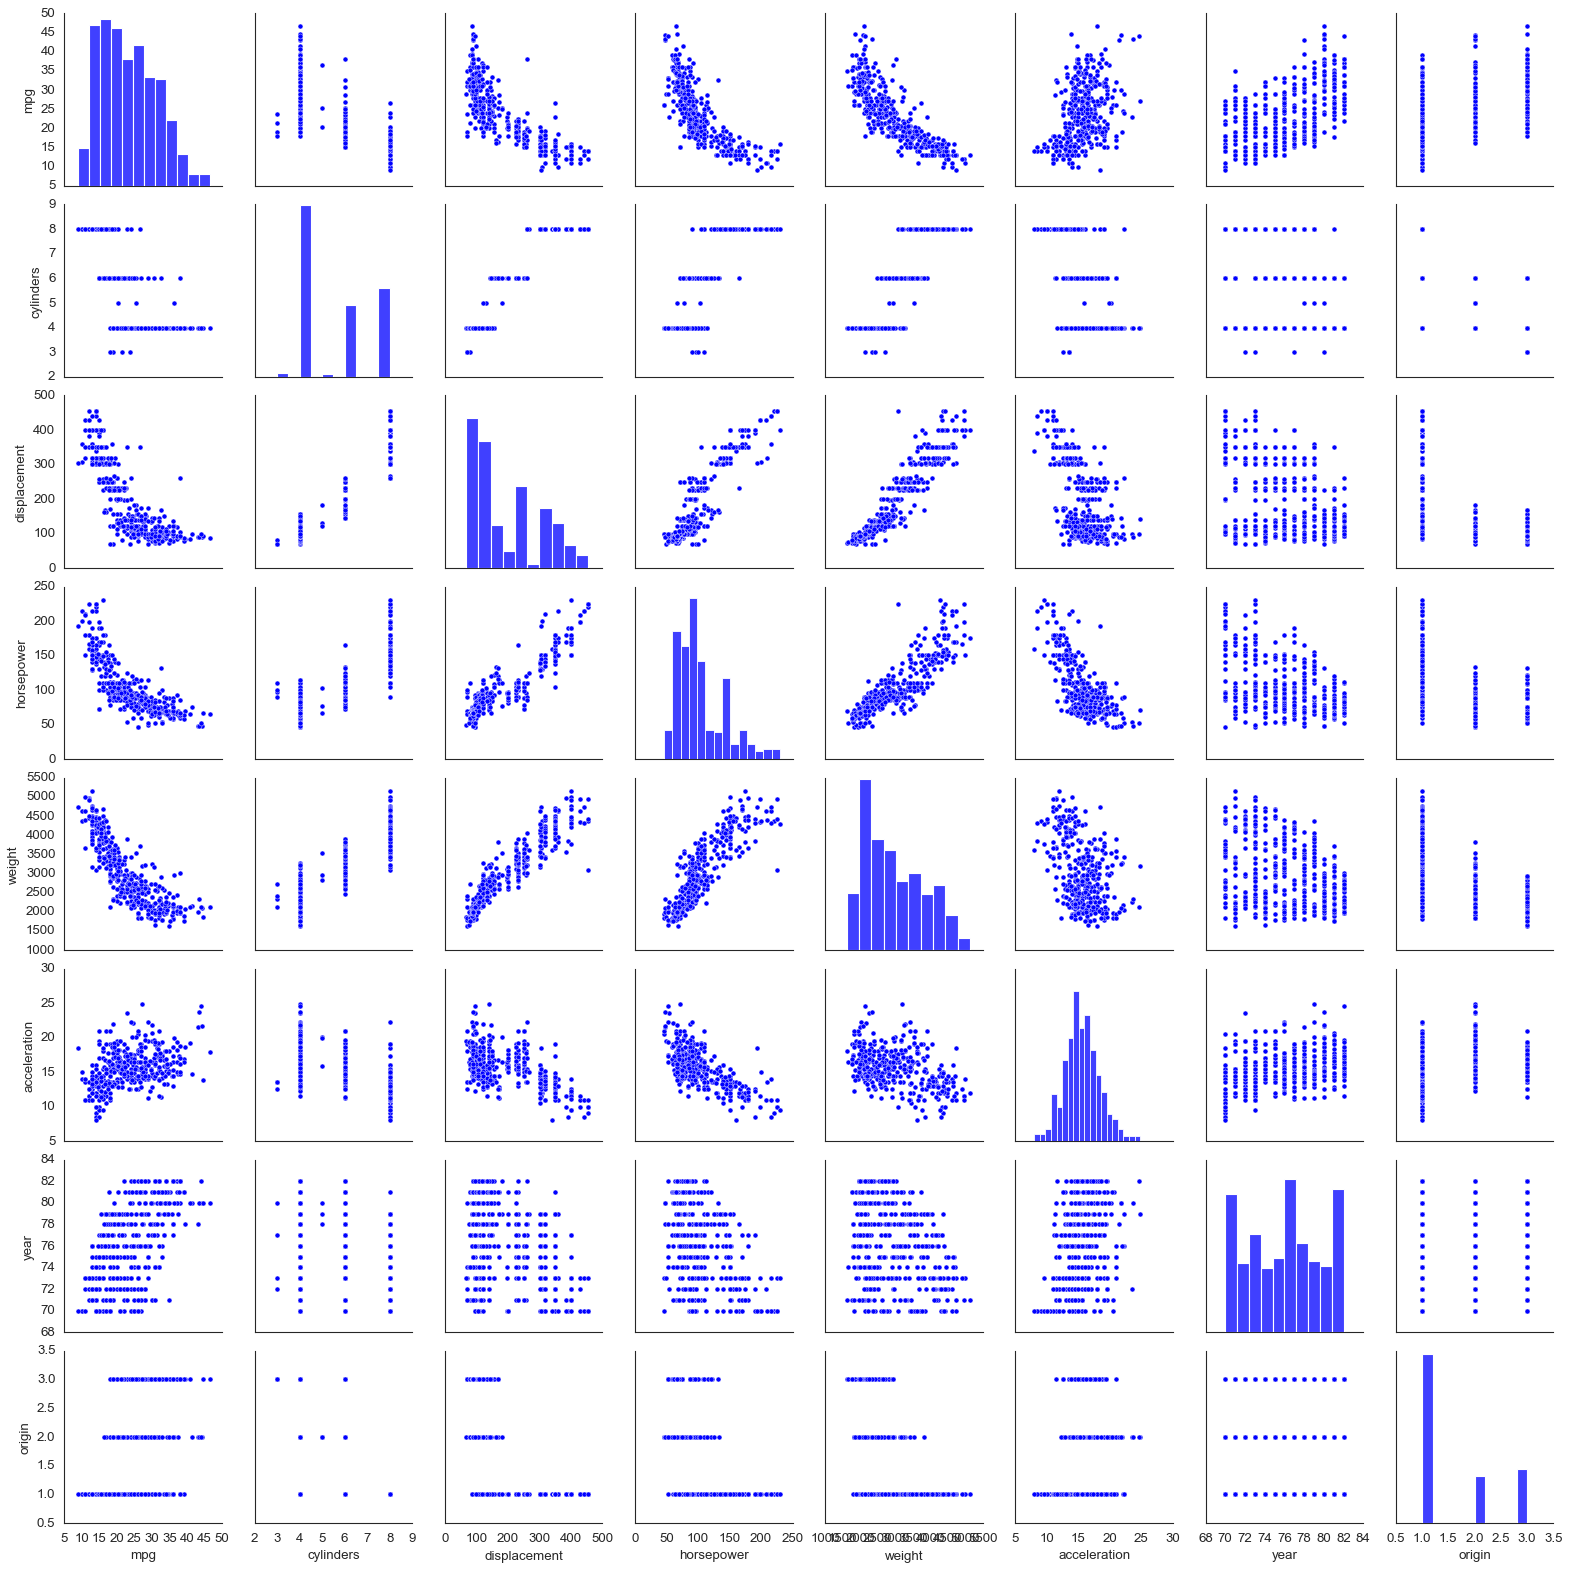

In [16]:
sns.pairplot(Auto);

#### **(b)** Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

In [17]:
corrM = Auto.drop(['name'], axis=1).corr()
corrM.style.background_gradient(cmap='coolwarm').set_precision(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35,-0.57
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.61
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42,-0.46
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.59
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29,0.21
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00,0.18
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1.00


#### (c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:

1. Is there a relationship between the predictors and the response?
2. Which predictors appear to have a statistically significant relationship to the response?
3. What does the coefficient for the year variable suggest?

In [29]:
data_ml = Auto.drop(['name'], axis=1)
X1_ml = data_ml.drop(['mpg'], axis=1)
Y_ml = data_ml['mpg']
X_ml = sm.add_constant(X1_ml)

In [30]:
results_ml = sm.OLS(Y_ml, X_ml).fit()

In [31]:
results_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 23 Aug 2021   Prob (F-statistic):          2.04e-139
Time:                        08:38:08   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i. Is there a relationship between the predictor and the response? 
> We can answer this question by testing the null hypothesis. The p-value corresponding to the F-statistic is very small, indicating a clear evidence of a relationship between the predictors and the response variables.

ii. Which predictors appear to have a statistically significant relationship to the response?
> `displacement`, `weight`, `year` and `origin` variables have p-values less than 0.05, which means they are statistically significant.

iii. What does the coefficient for the year variable suggest?
> The coefficient ot the `year` variable suggests that the average effect of an increase of 1 year is an increase of 0.7508 in `mpg` (all other predictors remaining constant). In other words, cars become more fuel efficient every year by almost 0.75 mpg / year.

#### (d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

In [32]:
fitted_values_ml = results_ml.fittedvalues
residuals_ml = results_ml.resid
studentized_residuals_ml = results_ml.get_influence().resid_studentized_external
model_norm_residuals_abs_sqrt_ml = np.sqrt(np.abs(studentized_residuals))
# leverage, from statsmodels internals
model_leverage_ml = results_ml.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks_ml = results_ml.get_influence().cooks_distance[0]

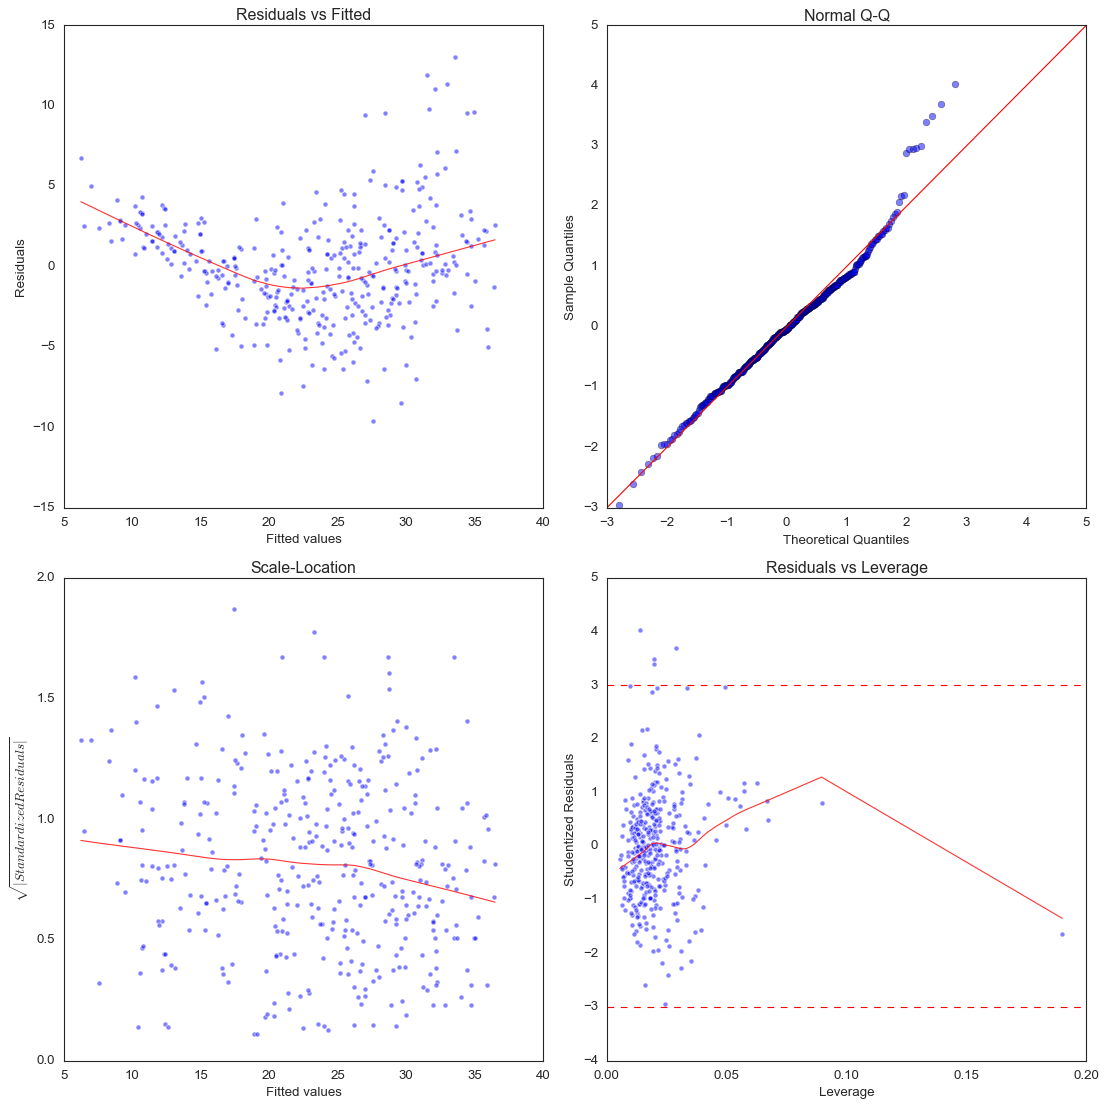

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(14, 14))

# Residual vs Fitted
sns.regplot(fitted_values_ml, residuals_ml,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax1);

ax1.scatter(fitted_values_ml, residuals_ml, alpha=0.5);
ax1.set_title('Residuals vs Fitted')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals');

# Q-Q plot
QQ = ProbPlot(studentized_residuals_ml)
QQ.qqplot(line='45', alpha=0.5, color='blue', lw=1, ax=ax2)
ax2.set_title('Normal Q-Q')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Sample Quantiles');

# Scale-location
sns.regplot(fitted_values_ml, model_norm_residuals_abs_sqrt_ml,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax3);
ax3.scatter(fitted_values_ml, model_norm_residuals_abs_sqrt_ml, alpha=0.5);
ax3.set_title('Scale-Location')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('$\sqrt{|Standardized Residuals|}$');

# Residuals vs Leverage
sns.regplot(model_leverage_ml, studentized_residuals_ml,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax4);

ax4.scatter(model_leverage_ml, studentized_residuals_ml, alpha=0.5);
ax4.axhline(y=3, color='red', linestyle='--')
ax4.axhline(y=-3, color='red', linestyle='--')
ax4.set_title('Residuals vs Leverage')
ax4.set_xlabel('Leverage')
ax4.set_ylabel('Studentized Residuals');


fig.tight_layout()
plt.show()

**Interpretation:**

* The residual vs fitted plot clearly shows the violation of the linear assumption. The model unable to capture the non-linear behavior of the data. Also, a funnel shape is evident in the plot, which suggest non constant variance i.e. heteroskedasticity. Although, the multiple linear model suggest much better fit, than the single predictor model.
* Based on the Q-Q plot, which follows a roughly straight line, the normal distribution can be assumed.
* The scale-location plot suggest minimal heteroscedasticity.
* Outliers and high leverage points can be identified using the residula vs leverage plot. Points with absolute studentized residual value greater, than 3 may be considered as an outlier (in this case, fwe datapoints may be outliers). High leverage points appear at the far right side of the plot. One high leverage point can be identified.

#### (e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [64]:
data_ml = sm.add_constant(data_ml)
formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin) + const \
    + cylinders*displacement \
    + cylinders*horsepower \
    + cylinders*weight \
    + cylinders*acceleration \
    + cylinders*year \
    + displacement*horsepower \
    + displacement*weight \
    + displacement*acceleration \
    + displacement*year \
    + horsepower*weight \
    + horsepower*acceleration \
    + horsepower*year \
    + weight*weight \
    + weight*acceleration \
    + weight*year \
    + acceleration*year \
    '

In [65]:
results_int = smf.ols(formula=formula, data=data_ml).fit()
results_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     121.8
Date:                Mon, 23 Aug 2021   Prob (F-statistic):          1.66e-156
Time:                        09:27:48   Log-Likelihood:                -939.16
No. Observations:                 392   AIC:                             1926.
Df Residuals:                     368   BIC:                             2022.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -9.7078     24.885     -0.390      0.697     -58.643      39.227
C(origin)[T.2]                1.4394      0.543      2.652      0.008       0.372       2.507
C(origin)[T.3]                1.2321      0.514      2.397      0.017       0.221       2.243
cylinders                     6.7083      8.230      0.815      0.416      -9.475      22.891
displacement                 -0.3032      0.180     -1.680      0.094      -0.658       0.052
horsepower                    0.3628      0.326      1.112      0.267      -0.279       1.005
weight                        0.0068      0.017      0.392      0.696      -0.028       0.041
acceleration                 -4.6534      2.114     -2.201      0.028      -8.811      -0.496
year                          1.1361      0.584      1.946      0.052      -0.012       2.284
const                        -9.7078     24.885     -0.390      0.697     -58.643      39.227
cylinders:displacement       -0.0129      0.005     -2.719      0.007      -0.022      -0.004
cylinders:horsepower          0.0316      0.024      1.338      0.182      -0.015       0.078
cylinders:weight              0.0004      0.001      0.519      0.604      -0.001       0.002
cylinders:acceleration        0.2870      0.167      1.720      0.086      -0.041       0.615
cylinders:year               -0.1699      0.095     -1.793      0.074      -0.356       0.016
displacement:horsepower      -0.0002      0.000     -0.543      0.588      -0.001       0.000
displacement:weight         3.01e-05   1.38e-05      2.186      0.029    3.02e-06    5.72e-05
displacement:acceleration    -0.0063      0.003     -1.970      0.050      -0.013   -1.14e-05
displacement:year             0.0052      0.002      2.345      0.020       0.001       0.010
horsepower:weight         -3.715e-05   2.84e-05     -1.310      0.191   -9.29e-05    1.86e-05
horsepower:acceleration      -0.0040      0.004     -1.112      0.267      -0.011       0.003
horsepower:year              -0.0052      0.004     -1.338      0.182      -0.013       0.002
weight:acceleration           0.0002      0.000      0.731      0.465      -0.000       0.001
weight:year                  -0.0003      0.000     -1.191      0.234      -0.001       0.000
acceleration:year             0.0531      0.025      2.098      0.037       0.003       0.103
==============================================================================
Omnibus:                       35.883   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.345
Skew:                           0.466   Prob(JB):                     4.84e-19
Kurtosis:                       5.073   Cond. No.                     2.85e+20
========================================================

In [71]:
# If we take p < 0.05 as our significance threshold
# which features appear as significant in this model?
results_int.pvalues[results_int.pvalues < 0.05].sort_values()


cylinders:displacement       0.006867
C(origin)[T.2]               0.008352
C(origin)[T.3]               0.017020
displacement:year            0.019580
acceleration                 0.028365
displacement:weight          0.029446
acceleration:year            0.036595
displacement:acceleration    0.049588
dtype: float64